In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.shape
data1=data

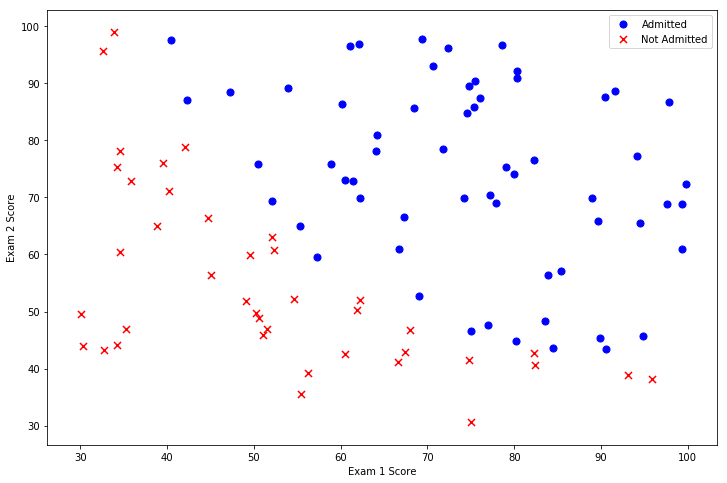

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)

In [6]:
def cost(theta, X, y):
    h = sigmoid(X.dot(theta))
    first = (-1*y).T.dot(np.log(h))
    second = (1 - y).T.dot(np.log(1 - h))
    return np.sum(first - second) / (len(X))

In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    theta_tmp = theta
    mth = theta.size
    
    for iter in np.arange(num_iters):
        
        for i in xrange(mth):
            h = sigmoid(X.dot(theta))
            theta_tmp[i] = theta[i] - (alpha*(X[:,i].T.dot(h-y)))/m
        theta = theta_tmp
        J_history[iter] = cost(theta, X, y)
    return(theta, J_history)

In [8]:
#Elige los parámetros de alfa e iteraciones
alpha = 0.001
num_iters = 150000
nvars=X[0,:].size
theta = np.zeros((nvars,1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

('theta: ', array([-6.28079066,  0.05647084,  0.04975743]))


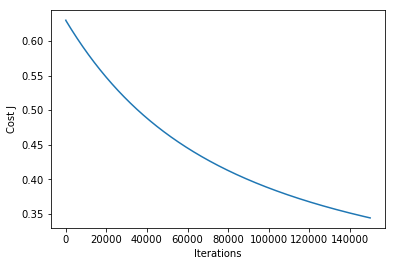

In [9]:
# theta for minimized cost J
print('theta: ',theta.ravel())

plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [10]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [11]:
def plotData(dataw, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = dataw[:,2] == 0
    pos = dataw[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(dataw[pos][:,0], dataw[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(dataw[neg][:,0], dataw[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);


In [12]:
data1 = loaddata('ex2data1.txt', ',')

('Dimensions: ', (100, 3))
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


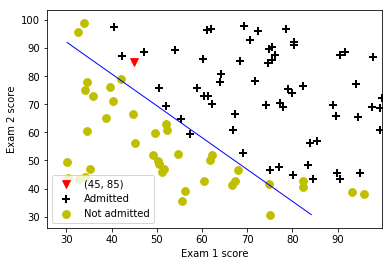

In [13]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data1, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(theta))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

In [14]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta)) >= threshold
    return(p.astype('int'))

In [15]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(theta))


array([ 0.62005425])

In [16]:
p = predict(theta, X).T 
print('Train accuracy {}%'.format(100*np.sum(p == y.ravel())/p.size))


Train accuracy 91%
